In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from plotly import express as px
from plotly import graph_objects as go
from Custom import (
    Matrix, 
    Summary, 
    All, 
    Knn_Greedy,
)
pyplot.style.use('fivethirtyeight')
pyplot.style.use('dark_background')

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
star_color_dict = {color: index for index, color in enumerate(dataset["Star color"].unique())}
star_class_dict = {s_class: index for index, s_class in enumerate(dataset["Spectral Class"].unique())}

dataset_replaced = dataset.copy()
dataset_replaced["Star color"] = dataset_replaced["Star color"].replace(star_color_dict)
dataset_replaced["Spectral Class"] = dataset_replaced["Spectral Class"].replace(star_class_dict)

In [5]:
dataset_lineer = dataset_replaced.copy()

In [6]:
X = dataset_lineer.drop("Star color",axis=1)
y = dataset_lineer["Star color"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, random_state=42)

96     16
228     6
25      3
182     0
18      0
       ..
106     6
14      0
92     14
179     7
102     6
Name: Star color, Length: 210, dtype: int64

In [34]:
from sklearn.linear_model import LinearRegression

Lineer = LinearRegression()
Lineer.fit(X_train, y_train)
()       

sklearn.linear_model._base.LinearRegression

In [9]:
Lineer_score = Lineer.score(X_test, y_test)
Lineer_score

0.5064585420327998

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
()

()

In [11]:
Ridge_score = ridge.score(X_test, y_test)
Ridge_score

0.506998814585737

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
()

()

In [13]:
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.4152877695619922

In [14]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
()

()

In [15]:
LogisticRegression_Score = logistic_regression.score(X_test, y_test)
LogisticRegression_Score

0.3333333333333333

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.18      0.50      0.27         4
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           6       1.00      0.31      0.47        26
           7       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0

    accuracy                           0.33        30
   macro avg       0.17      0.12      0.11        30
weighted avg       0.89      0.33      0.44        30
 
 F1 Score for Logistic Regression: 0.44339869281045746 
 Precision Score for Logistic Regression: 0.8909090909090909 
 Recall Score for Logistic Regression: 0.3333333333333333 
 Confusion Matrix for Logistic Regression: [[2 0 1 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [9 3 0 8 5 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


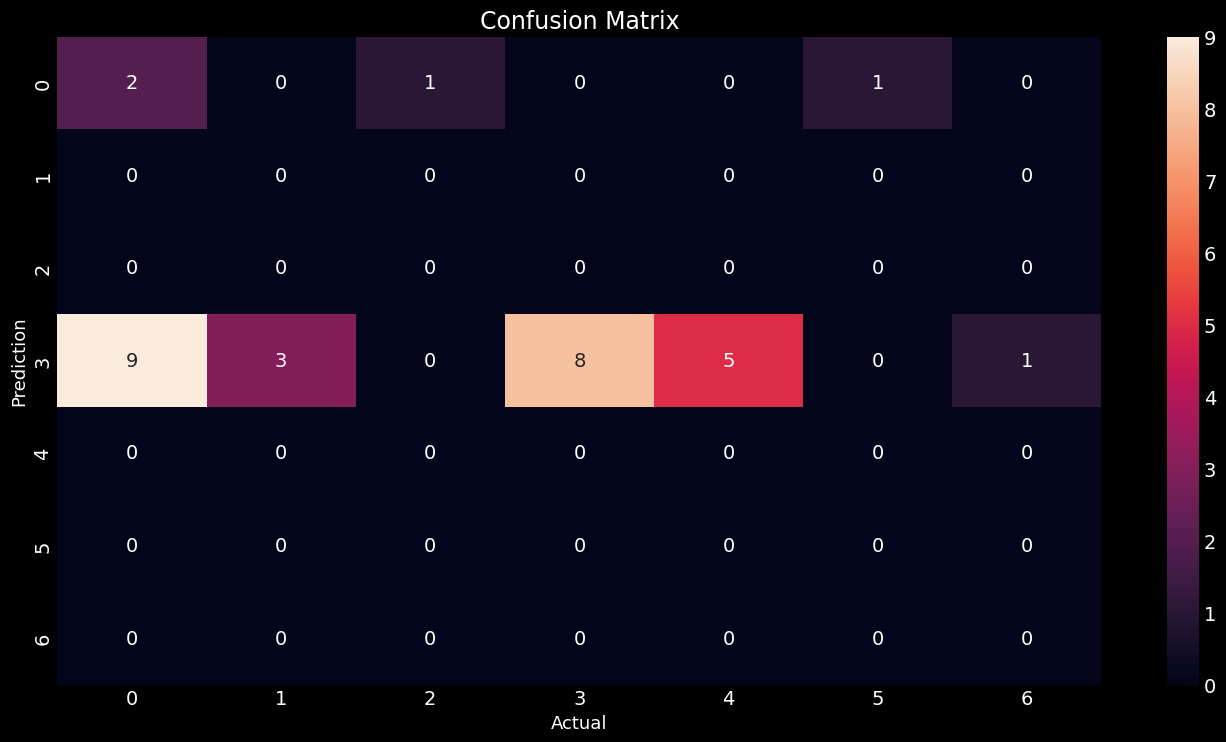

In [16]:
All("Logistic Regression", logistic_regression.predict(X_test), y_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
KNeighborsClassifier_Score = knn.score(X_test, y_test)
KNeighborsClassifier_Score

0.6666666666666666

In [18]:
Knn_Greedy(X_train, X_test, y_train, y_test,False,2)

(0.7, 3)

Classification Report for KNNeighbors:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           6       0.46      0.75      0.57         8
           7       1.00      0.20      0.33         5
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.67        30
   macro avg       0.41      0.33      0.33        30
weighted avg       0.70      0.67      0.62        30
 
 F1 Score for KNNeighbors: 0.6240476190476191 
 Precision Score for KNNeighbors: 0.7 
 Recall Score for KNNeighbors: 0.6666666666666666 
 Confusion Matrix for KNNeighbors: [[11  0  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 2  0  0  6  0  0  0  0]
 [ 0  0  0  4  1  0  0  0]
 

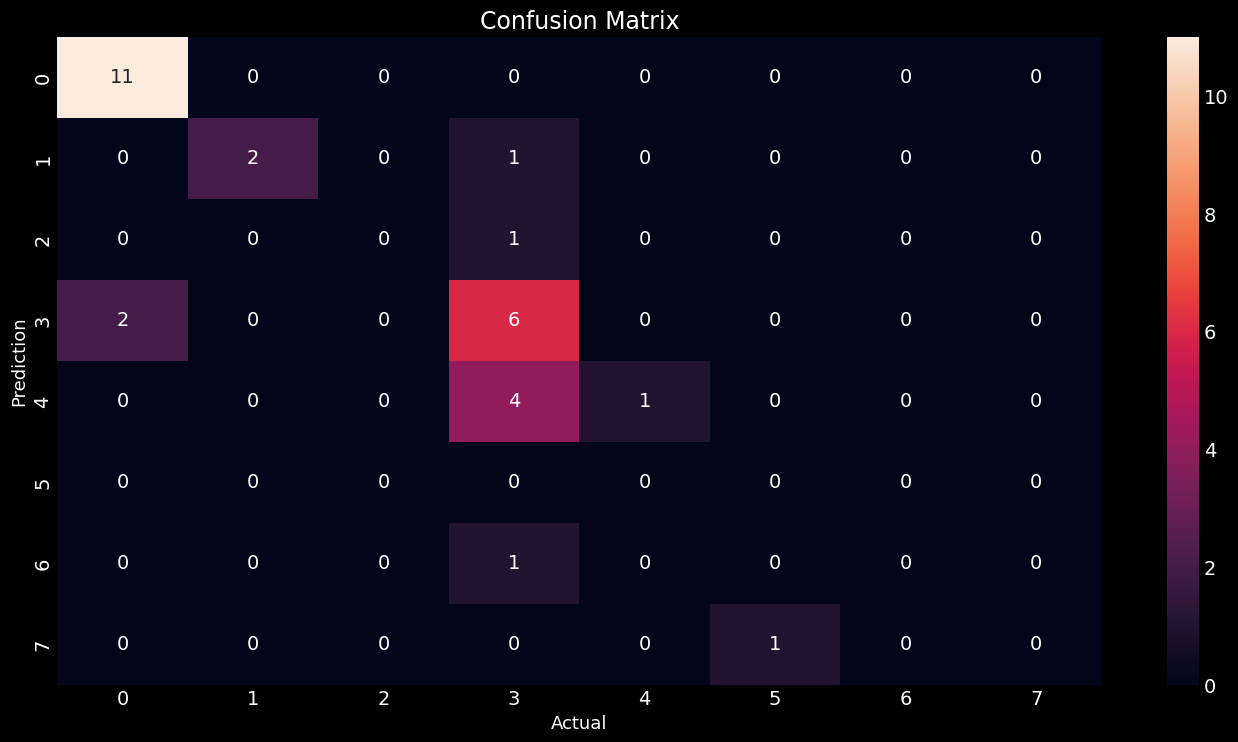

In [19]:
All("KNNeighbors", y_test, y_pred_knn)

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_linner_predict = svm.predict(X_test)
svm_score

0.8

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predict = svm.predict(X_test)
svm_score

0.4666666666666667

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predict = svm.predict(X_test)
svm_score

0.5

Classification Report for SVM (Linner):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           6       0.62      1.00      0.76         8
           7       1.00      0.40      0.57         5
          10       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0

    accuracy                           0.80        30
   macro avg       0.58      0.51      0.52        30
weighted avg       0.83      0.80      0.78        30
 
 F1 Score for SVM (Linner): 0.7784126984126983 
 Precision Score for SVM (Linner): 0.8307692307692308 
 Recall Score for SVM (Linner): 0.8 
 Confusion Matrix for SVM (Linner): [[11  0  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  8  0  0  0  0]
 [ 0  0  0  3  2  0  0 

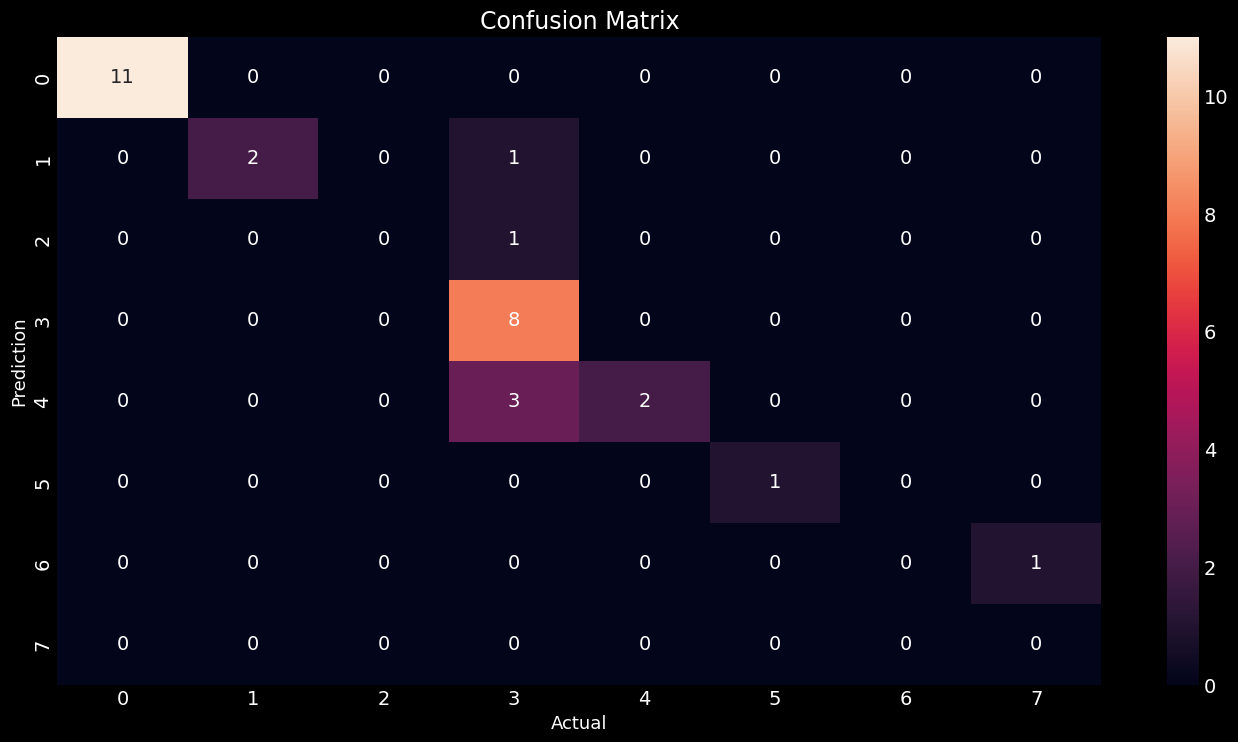

In [31]:
All("SVM (Linner)", y_test, svm_linner_predict)

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, y_test)


Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           6       0.80      1.00      0.89         8
           7       1.00      0.80      0.89         5
          10       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0

    accuracy                           0.87        30
   macro avg       0.53      0.50      0.51        30
weighted avg       0.88      0.87      0.87        30
 
 F1 Score for Decision Tree Classifier: 0.8651851851851852 
 Precision Score for Decision Tree Classifier: 0.88 
 Recall Score for Decision Tree Classifier: 0.8666666666666667 
 Confusion Matrix for Decision Tree Classifier: [[11  0  0  0  0

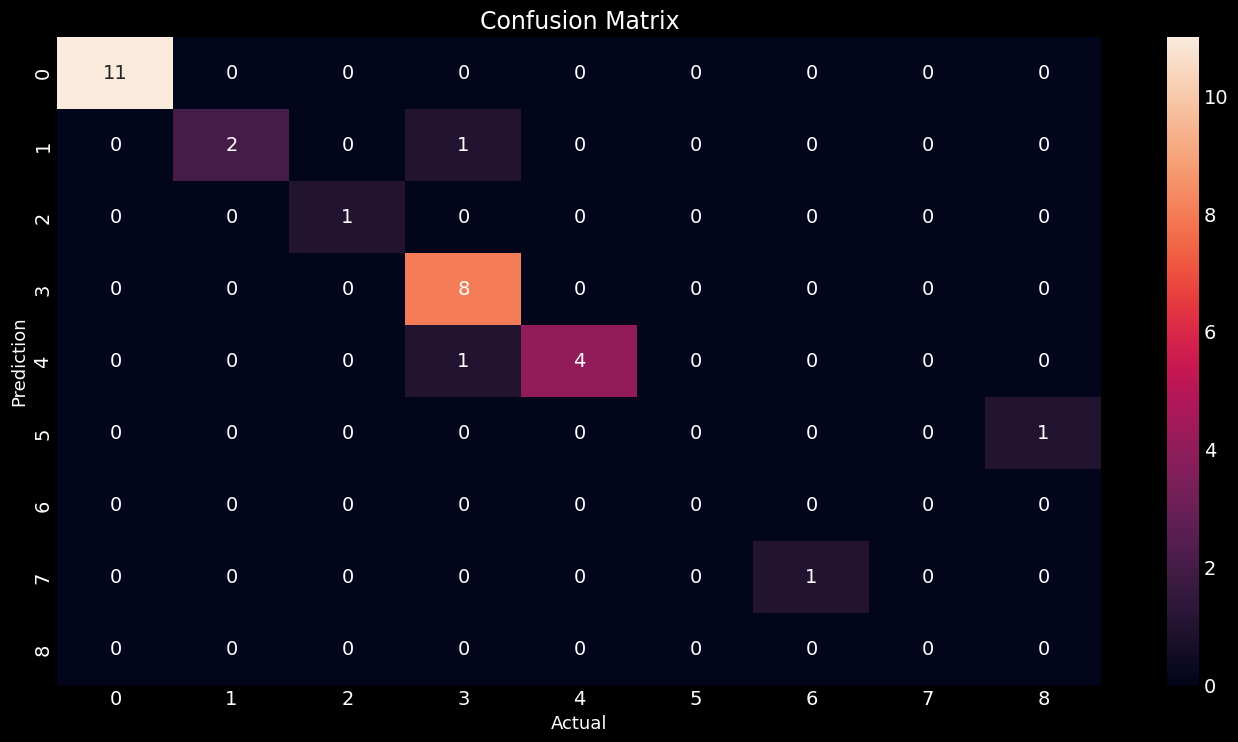

In [25]:
All("Decision Tree Classifier", y_test, y_pred_dt)

In [26]:
from sklearn import tree
fig = pyplot.figure(figsize=(100,80))
tree.plot_tree(decision_tree, 
    feature_names=dataset_replaced.columns,  
    fontsize=15, rounded=True,)
fig.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_score = random_forest.score(X_test, y_test)
random_forest_predict = random_forest.predict(X_test)
random_forest_score


0.8333333333333334

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           6       0.73      1.00      0.84         8
           7       1.00      0.60      0.75         5
          10       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0

    accuracy                           0.83        30
   macro avg       0.58      0.53      0.54        30
weighted avg       0.83      0.83      0.81        30
 
 F1 Score for Random Forest Classifier: 0.8136193745232647 
 Precision Score for Random Forest Classifier: 0.8300505050505049 
 Recall Score for Random Forest Classifier: 0.8333333333333334 
 Confusion Matrix for Random Forest Classifier: [[11  0  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [

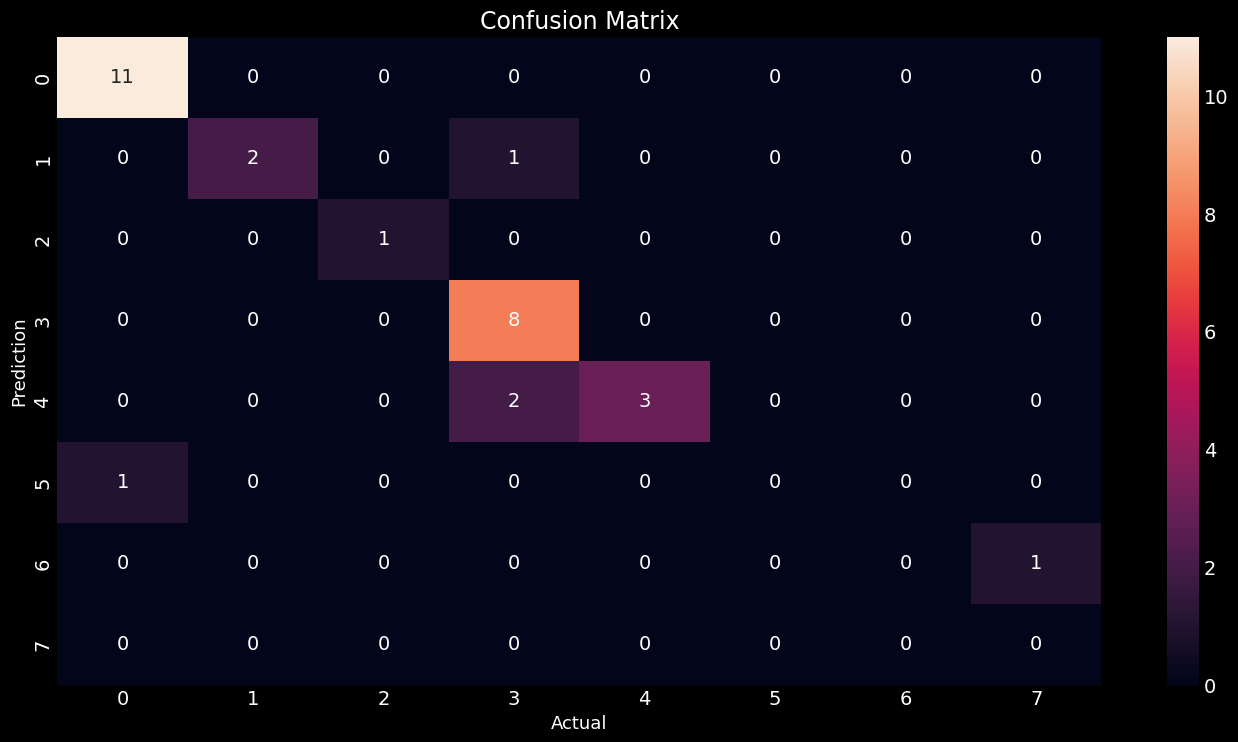

In [28]:
All("Random Forest Classifier", y_test, random_forest_predict)

In [29]:
scores = [Lineer_score, Ridge_score, lasso_score, LogisticRegression_Score, KNeighborsClassifier_Score, svm_score, decision_tree_accuracy, random_forest_score]
best_model_index = scores.index(max(scores))
best_model_name = ['Linear Regression', 'Ridge', 'Lasso', 'Logistic Regression', 'KNeighbors Classifier', 'SVM', 'Decision Tree', 'Random Forest'][best_model_index]
print(f"The best model is {best_model_name} with a score of {max(scores)}")

The best model is Decision Tree with a score of 0.8666666666666667
